In [115]:
import pandas as pd
from great_tables.data import gtcars

In [116]:
df = gtcars.dropna()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 46
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mfr          46 non-null     object 
 1   model        46 non-null     object 
 2   year         46 non-null     float64
 3   trim         46 non-null     object 
 4   bdy_style    46 non-null     object 
 5   hp           46 non-null     float64
 6   hp_rpm       46 non-null     float64
 7   trq          46 non-null     float64
 8   trq_rpm      46 non-null     float64
 9   mpg_c        46 non-null     float64
 10  mpg_h        46 non-null     float64
 11  drivetrain   46 non-null     object 
 12  trsmn        46 non-null     object 
 13  ctry_origin  46 non-null     object 
 14  msrp         46 non-null     float64
dtypes: float64(8), object(7)
memory usage: 5.8+ KB
None


,mfr,model,year,trim,bdy_style,hp,hp_rpm,trq,trq_rpm,mpg_c,mpg_h,drivetrain,trsmn,ctry_origin,msrp
0,Ford,GT,2017.0,Base Coupe,coupe,647.0,6250.0,550.0,5900.0,11.0,18.0,rwd,7a,United States,447000.0
1,Ferrari,458 Speciale,2015.0,Base Coupe,coupe,597.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,291744.0
2,Ferrari,458 Spider,2015.0,Base,convertible,562.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,263553.0
3,Ferrari,458 Italia,2014.0,Base Coupe,coupe,562.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,233509.0
4,Ferrari,488 GTB,2016.0,Base Coupe,coupe,661.0,8000.0,561.0,3000.0,15.0,22.0,rwd,7a,Italy,245400.0


In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [118]:
target = 'msrp'
features = ['mfr', 'model', 'year', 'trim', 'bdy_style', 'hp', 'hp_rpm', 'trq','trq_rpm', 'mpg_c', 'mpg_h', 'drivetrain', 'trsmn', 'ctry_origin']
X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = make_pipeline(
#     SimpleImputer(),
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    Ridge()

)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['mfr', 'model', 'trim', 'bdy_style',
                                     'drivetrain', 'trsmn', 'ctry_origin'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [120]:
model.predict(X_test)

array([-104261.52355574,  200383.45656886,  259621.2735783 ,
        124129.59712203,   64549.63568455,   62121.98911422,
        430063.0611156 ,  323248.09914371,  504593.78313425,
        436939.8789556 ])

In [121]:
import requests
import textwrap
import pandas as pd
# !pip install BeautifulSoup
from bs4 import BeautifulSoup
# from lets_plot import *



In [122]:
# url = "https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data"

# # Get the data from the ONS API:
# json_data = requests.get(url).json()

# # Prep the data for a quick plot
# title = json_data["description"]["title"]
# title

In [123]:
df2 = (
    pd.DataFrame(pd.json_normalize(json_data["months"]))
    .assign(
        date=lambda x: pd.to_datetime(x["date"]),
        value=lambda x: pd.to_numeric(x["value"]),
    )
#     .set_index("date")
)

df2

<ipython-input-123-e8d9245b68ed>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date=lambda x: pd.to_datetime(x["date"]),


,date,label,month,quarter,sourceDataset,updateDate,value,year
0,2001-05-01,2001 APR-JUN,May,,UNEM,2022-04-11T23:00:00.000Z,568,2001
1,2001-06-01,2001 MAY-JUL,June,,UNEM,2022-04-11T23:00:00.000Z,564,2001
2,2001-07-01,2001 JUN-AUG,July,,UNEM,2023-04-17T23:00:00.000Z,554,2001
3,2001-08-01,2001 JUL-SEP,August,,UNEM,2022-04-11T23:00:00.000Z,554,2001
4,2001-09-01,2001 AUG-OCT,September,,UNEM,2022-04-11T23:00:00.000Z,536,2001
...,...,...,...,...,...,...,...,...
268,2023-09-01,2023 AUG-OCT,September,,UNEM,2024-02-13T00:00:00.000Z,839,2023
269,2023-10-01,2023 SEP-NOV,October,,UNEM,2024-01-16T00:00:00.000Z,833,2023
270,2023-11-01,2023 OCT-DEC,November,,UNEM,2024-03-12T00:00:00.000Z,816,2023
271,2023-12-01,2023 NOV-JAN,December,,UNEM,2024-03-12T00:00:00.000Z,809,2023


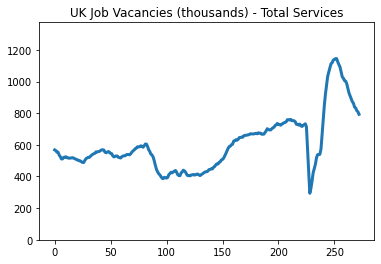

In [124]:
df2["value"].plot(title=title, ylim=(0, df2["value"].max() * 1.2), lw=3.0);

In [125]:
# !pip install geopandas
from lets_plot import *
from lets_plot.geo_data import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [126]:
df.head()

,mfr,model,year,trim,bdy_style,hp,hp_rpm,trq,trq_rpm,mpg_c,mpg_h,drivetrain,trsmn,ctry_origin,msrp
0,Ford,GT,2017.0,Base Coupe,coupe,647.0,6250.0,550.0,5900.0,11.0,18.0,rwd,7a,United States,447000.0
1,Ferrari,458 Speciale,2015.0,Base Coupe,coupe,597.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,291744.0
2,Ferrari,458 Spider,2015.0,Base,convertible,562.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,263553.0
3,Ferrari,458 Italia,2014.0,Base Coupe,coupe,562.0,9000.0,398.0,6000.0,13.0,17.0,rwd,7a,Italy,233509.0
4,Ferrari,488 GTB,2016.0,Base Coupe,coupe,661.0,8000.0,561.0,3000.0,15.0,22.0,rwd,7a,Italy,245400.0


In [127]:
(
    ggplot(df, aes(x="mfr", fill="bdy_style"))
    + geom_bar()
)

In [128]:
zw = geocode("state").scope("Zimbabwe").get_boundaries(2)
zw

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
(
    ggplot()
    + geom_map(aes(fill="found name"), map=zw, color="white")
    + coord_map(xlim=(-10, 6), ylim=(50, 59))
#     + geom_point(data=cities, size=5)
    + theme(legend_position="none")
)